<a href="https://colab.research.google.com/github/Priyanka-Kugapriya/Clustering_notebook/blob/main/Assigning_labels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

#changepath to CSV

df= pd.read_csv("/content/sample_data/Layer-Readings_2.csv",header=None)

In [2]:
df.columns = ['0','1','2', '3','4','5','6','7','8','9','10','11','12','13','14']

In [3]:
print(df)

            0        1           2          3  ...   11   12   13     14
0           0        0  329.996735  36.054607  ...  0.0  0.0  0.0  31669
1           0        0  330.775604  37.902195  ...  0.0  0.0  0.0  31670
2           0        0  329.943512  42.349632  ...  0.0  0.0  0.0  31671
3           0        0  329.553131  41.687881  ...  0.0  0.0  0.0  31672
4           0        0  332.050140  42.752476  ...  0.0  0.0  0.0  31673
...       ...      ...         ...        ...  ...  ...  ...  ...    ...
663109  16854  2293761  331.718628  42.900658  ...  0.0  0.0  0.0  21033
663110  16959  2293761  330.562775  37.563095  ...  0.0  0.0  0.0  21034
663111  17065  2293761  330.347748  41.163986  ...  0.0  0.0  0.0  21035
663112  17172  2293761  331.059784  32.140606  ...  0.0  0.0  0.0  21036
663113  17277  2293761  330.106598  31.508242  ...  0.0  0.0  0.0  21037

[663114 rows x 15 columns]


In [4]:
df.drop(['0','1','3','5','14', '7', '9', '11', '13'],axis='columns', inplace=True)

In [5]:
print(df)

                 2            4          6            8   10   12
0       329.996735     0.000000    0.00000     0.000000  0.0  0.0
1       330.775604     0.000000    0.00000     0.000000  0.0  0.0
2       329.943512   363.551544    0.00000     0.000000  0.0  0.0
3       329.553131  2318.262207  364.41507  2280.695313  0.0  0.0
4       332.050140     0.000000    0.00000     0.000000  0.0  0.0
...            ...          ...        ...          ...  ...  ...
663109  331.718628     0.000000    0.00000     0.000000  0.0  0.0
663110  330.562775   361.645508    0.00000     0.000000  0.0  0.0
663111  330.347748   362.771545    0.00000     0.000000  0.0  0.0
663112  331.059784     0.000000    0.00000     0.000000  0.0  0.0
663113  330.106598     0.000000    0.00000     0.000000  0.0  0.0

[663114 rows x 6 columns]


In [6]:
df['Index'] = range(0, 0+len(df))

In [7]:
cols = df.columns.tolist()
cols

['2', '4', '6', '8', '10', '12', 'Index']

In [8]:
cols = cols[-1:] + cols[:-1]
cols

['Index', '2', '4', '6', '8', '10', '12']

In [9]:
df = df[cols]
print(df)

         Index           2            4          6            8   10   12
0            0  329.996735     0.000000    0.00000     0.000000  0.0  0.0
1            1  330.775604     0.000000    0.00000     0.000000  0.0  0.0
2            2  329.943512   363.551544    0.00000     0.000000  0.0  0.0
3            3  329.553131  2318.262207  364.41507  2280.695313  0.0  0.0
4            4  332.050140     0.000000    0.00000     0.000000  0.0  0.0
...        ...         ...          ...        ...          ...  ...  ...
663109  663109  331.718628     0.000000    0.00000     0.000000  0.0  0.0
663110  663110  330.562775   361.645508    0.00000     0.000000  0.0  0.0
663111  663111  330.347748   362.771545    0.00000     0.000000  0.0  0.0
663112  663112  331.059784     0.000000    0.00000     0.000000  0.0  0.0
663113  663113  330.106598     0.000000    0.00000     0.000000  0.0  0.0

[663114 rows x 7 columns]


In [10]:
df2 = df.set_index('Index').stack().reset_index()

In [11]:
print(df2)

          Index level_1           0
0             0       2  329.996735
1             0       4    0.000000
2             0       6    0.000000
3             0       8    0.000000
4             0      10    0.000000
...         ...     ...         ...
3978679  663113       4    0.000000
3978680  663113       6    0.000000
3978681  663113       8    0.000000
3978682  663113      10    0.000000
3978683  663113      12    0.000000

[3978684 rows x 3 columns]


In [12]:
df3 = df2.rename(columns = {'level_1': 'Column', 0: 'Value'}, inplace = False)

In [13]:
df4 = df3.loc[~((df3['Value'] == 0))]

In [14]:
print(df4)

          Index Column       Value
0             0      2  329.996735
6             1      2  330.775604
12            2      2  329.943512
13            2      4  363.551544
18            3      2  329.553131
...         ...    ...         ...
3978661  663110      4  361.645508
3978666  663111      2  330.347748
3978667  663111      4  362.771545
3978672  663112      2  331.059784
3978678  663113      2  330.106598

[1336996 rows x 3 columns]


In [23]:
df_plot= df4
df_plot['num']=df_plot.index
df_plot=df_plot[df_plot['num']%10==0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:
print(df_plot)

          Index Column       Value      num
0             0      2  329.996735        0
20            3      6  364.415070       20
30            5      2  330.559082       30
60           10      2  330.936737       60
90           15      2  331.180298       90
...         ...    ...         ...      ...
3978540  663090      2  330.824951  3978540
3978570  663095      2  331.899994  3978570
3978600  663100      2  330.223846  3978600
3978630  663105      2  329.867157  3978630
3978660  663110      2  330.562775  3978660

[164174 rows x 4 columns]


In [25]:
def  estimated_flayer_check(Value):
    if 1640.422485	<= Value < 2454.603760:   #range values defined using previously found 8 clusters 
        return 1
    elif 162.037338	<= Value < 507.744263:
        return 2
    elif 9.638062 <= Value < 158.638474:
        return 3
    elif 571.511841 <= Value < 1173.570801:
        return 4
    elif 2889.859619 <= Value < 3512.961670:
        return 5
    elif 2495.293701 <= Value < 2737.822754:
        return 6
    elif 2739.154053 <= Value < 2824.901123:
        return 7
    elif 2829.354736	<= Value < 2889.367920:
        return 8
    else:
        return 0                                  #values which does not come under specified range

In [27]:
df_plot['Estimated_layer'] = df_plot['Value'].apply(estimated_flayer_check)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [31]:
print(df_plot)

          Index Column       Value  Estimated_layer
0             0      2  329.996735                2
20            3      6  364.415070                2
30            5      2  330.559082                2
60           10      2  330.936737                2
90           15      2  331.180298                2
...         ...    ...         ...              ...
3978540  663090      2  330.824951                2
3978570  663095      2  331.899994                2
3978600  663100      2  330.223846                2
3978630  663105      2  329.867157                2
3978660  663110      2  330.562775                2

[164174 rows x 4 columns]


In [30]:
df_plot.drop(['num'],axis='columns', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



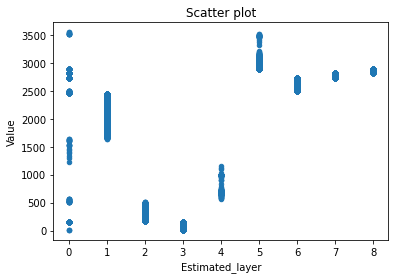

In [32]:
import matplotlib.pyplot as plot

df_plot.plot.scatter(x="Estimated_layer", y="Value", title= "Scatter plot");
plot.show(block=True);